In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
train_data = pd.read_excel("D:/DATASET/flight fare/Data_Train.xlsx")

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
36h 25m      1
19h 50m      1
33h 20m      1
35h 20m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_data.shape

(10682, 11)

In [22]:
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
 12  Journey_day      10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [21]:
train_data["Journey_Month"] = pd.to_datetime(train_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [25]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [30]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [32]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [34]:
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [35]:
train_data.drop("Dep_Time",axis=1,inplace=True)

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [38]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

In [39]:
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [40]:
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [56]:
duration = list(train_data.Duration)
print(duration)

['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', '3h', '1h 25m', '16h 35m

In [62]:
for i in range(len(duration)):
    print(len(duration[i].split())) #to check if we have h and m or just 1 of the two(ex.19h)

2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2


2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
1
1
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
1
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2


1
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
1
1
2
1
2
1
2
1
2
2
1
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
1
2
1
1
2
1
2
2
2
2
1
2
2
1
2
2
1
2
2
2
2
2
1
2
2
1
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
1
2
2
2
1
1
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
1
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [63]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 mins(ex.19h becomes 19h 0m)
        else:
            duration[i] = "0h " + duration[i].strip()  #adds 0 hours

In [65]:
print(duration)

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [68]:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [81]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [82]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [83]:
train_data.drop("Duration",axis=1,inplace=True)

## Handling Categorical Data

One can find many ways to handle categorical data,

1. Nominal Data(Order of the data is not imp.) = OneHotEncoder is used in this case
2. Ordinal Data(Order of the data is imp.) = LabelEncoder is used in this case

In [86]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

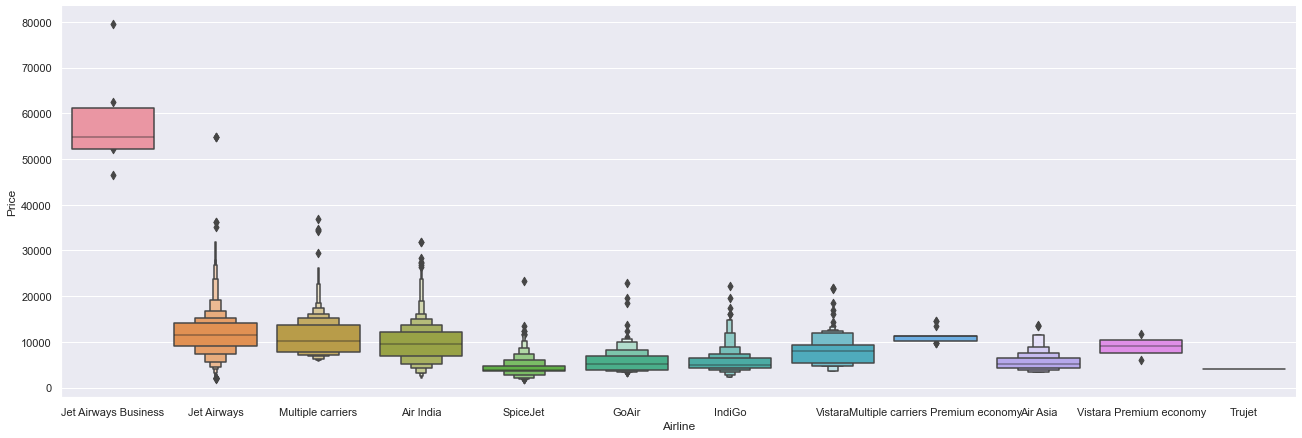

In [94]:
#From the graph we can see that Jet Airway Business has the highest price
#Apart from the 1t Airline, we can see that the rest of the Airlines has similar median

sns.catplot(y ="Price", x = "Airline",data=train_data.sort_values('Price',ascending=False),kind = "boxen",height=6,aspect=3)

In [95]:
# As the airline is Nominal Categorical Data we can use OneHotEncoding

Air = train_data["Airline"]

Air = pd.get_dummies(Air,drop_first=True)

Air.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [97]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [98]:
#Performing OneHotEncoding on the Source

sor = train_data["Source"]
sor = pd.get_dummies(sor,drop_first=True)
sor.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [101]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [103]:
#Performing OneHotEncoding on the Destination

dest = train_data["Destination"]
dest = pd.get_dummies(dest,drop_first=True)
dest.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [105]:
#Additional info contains almost 80% no_info
#Route can be dropped as it is similar to the no. of stops columns

train_data.drop(["Route","Additional_Info"],axis = 1, inplace=True)

In [106]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [108]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [110]:
#Total_Stops is an ordinal data and we can use LabelEncoder
#Here values are assigned with corresponding keys

train_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [111]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [112]:
#concat the transformed columns
train_data = pd.concat([train_data,Air,sor,dest],axis=1)

In [113]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [114]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [115]:
train_data.head()

,Total_Stops,Price,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_Month                      10682 non-null  int64
 3   Journey_day                        10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_min                            10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_min                        10682 non-null  int64
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

In [119]:
train_data.shape

(10682, 30)

## Test Set

In [120]:
test_data = pd.read_excel("D:/DATASET/flight fare/Test_set.xlsx")

In [121]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [122]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [123]:
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [124]:
test_data["Journey_Month"] = pd.to_datetime(test_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [125]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [126]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [127]:
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop("Dep_Time",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,55


In [128]:
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop("Arrival_Time",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,55,2,45


In [129]:
duration = list(test_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 mins(ex.19h becomes 19h 0m)
        else:
            duration[i] = "0h " + duration[i].strip()  #adds 0 hours

In [130]:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [131]:
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

In [132]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,55,2,45,2,50


In [134]:
test_data.drop("Duration",axis=1,inplace=True)

In [135]:
Air = test_data["Airline"]
Air = pd.get_dummies(Air,drop_first=True)
Air.head()

test_data["Source"].value_counts()
sor = test_data["Source"]
sor = pd.get_dummies(sor,drop_first=True)
sor.head()

test_data["Destination"].value_counts()
dest = test_data["Destination"]
dest = pd.get_dummies(dest,drop_first=True)
dest.head()

test_data.drop(["Route","Additional_Info"],axis = 1, inplace=True)


test_data.Total_Stops.value_counts()
test_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)


test_data = pd.concat([test_data,Air,sor,dest],axis=1)


test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int64
 2   Journey_Month                      2671 non-null   int64
 3   Dep_min                            2671 non-null   int64
 4   Arrival_hour                       2671 non-null   int64
 5   Arrival_min                        2671 non-null   int64
 6   Duration_hours                     2671 non-null   int64
 7   Duration_mins                      2671 non-null   int64
 8   Air India                          2671 non-null   uint8
 9   GoAir                              2671 non-null   uint8
 10  IndiGo                             2671 non-null   uint8
 11  Jet Airways                        2671 non-null   uint8
 12  Jet Airways Business

In [136]:
test_data.head()

,Total_Stops,Journey_day,Journey_Month,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,30,4,25,10,55,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,20,10,20,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,15,19,0,23,45,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,0,21,0,13,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,55,2,45,2,50,0,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
train_data.shape

(10682, 30)

In [138]:
test_data.shape

(2671, 27)

## Feature Selection

Finding out the best feature which will contribute and have agood relation with target variable.
Following are some of the feature selection methods,
1. Heatmap
2. feature_importance_
3. SelectKbBest

In [139]:
X = train_data.drop("Price",axis=1)

In [141]:
y = train_data["Price"]

In [145]:
X.columns

Index(['Total_Stops', 'Journey_Month', 'Journey_day', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

<AxesSubplot:>

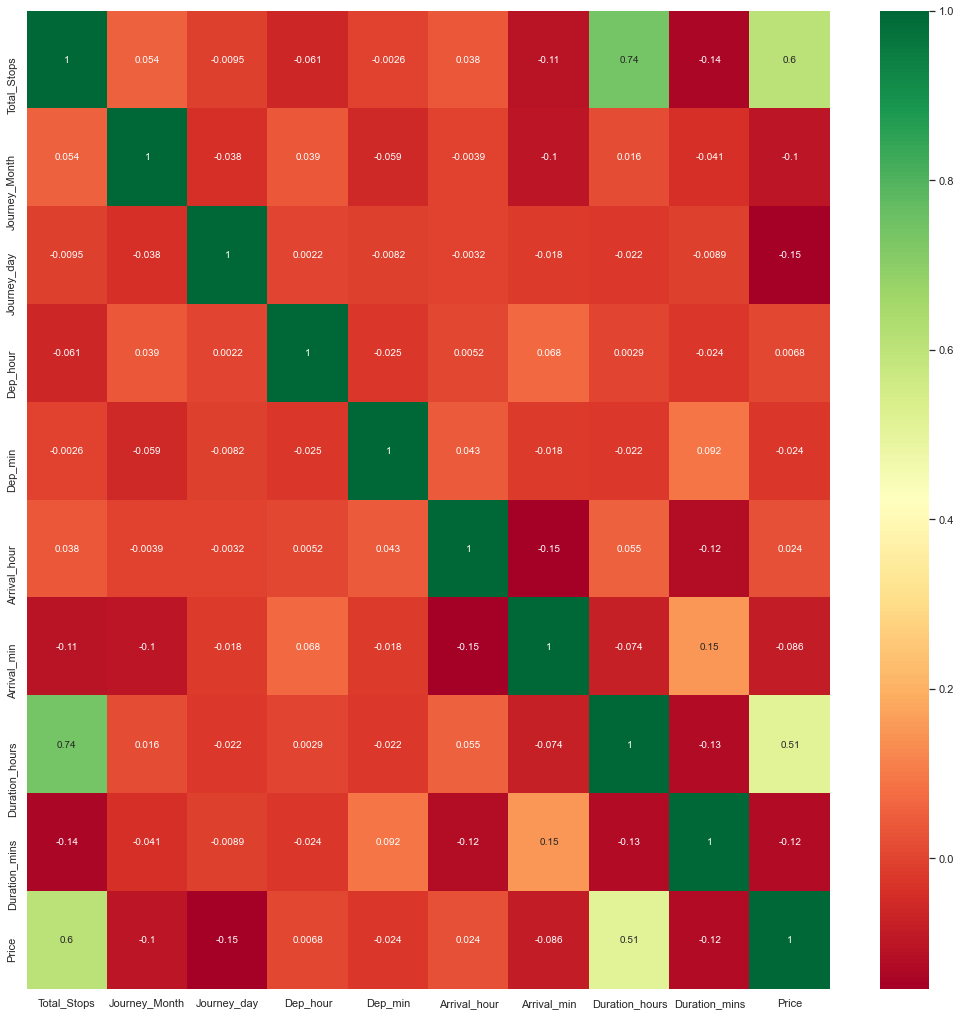

In [150]:
# Finding correlation between independent and dependent variables
plt.figure(figsize=(18,18))
sns.heatmap(train_data[['Total_Stops', 'Journey_Month', 'Journey_day', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins','Price']].corr(),annot=True,cmap="RdYlGn")

In [151]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [152]:
print(selection.feature_importances_)

[2.15987852e-01 5.24933918e-02 1.45141548e-01 2.39353079e-02
 2.18109590e-02 2.69715961e-02 1.92274188e-02 1.26066931e-01
 1.74432488e-02 1.06794108e-02 1.78724664e-03 1.75926260e-02
 1.44931112e-01 6.80894619e-02 2.15669159e-02 8.24098413e-04
 3.31267366e-03 9.93518158e-05 5.12857589e-03 7.45232060e-05
 5.10581456e-04 7.47710000e-03 3.22097156e-03 6.03932419e-03
 1.25187762e-02 1.45964753e-02 7.01252642e-03 5.49340241e-04
 2.49106558e-02]


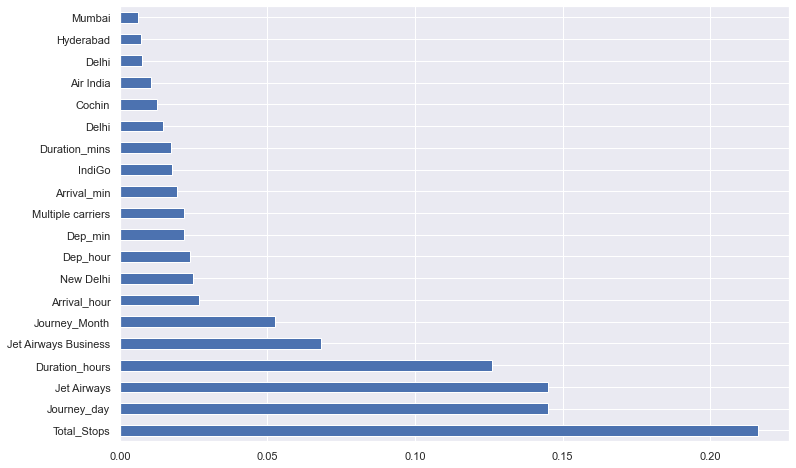

In [154]:
#plotting graph for feature_importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [156]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [157]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [159]:
y_pred = reg_rf.predict(X_test)

In [158]:
reg_rf.score(X_test,y_test)

0.7969290477485839

In [160]:
reg_rf.score(X_train,y_train)

0.9533472747433686

<Figure size 360x6120 with 0 Axes>

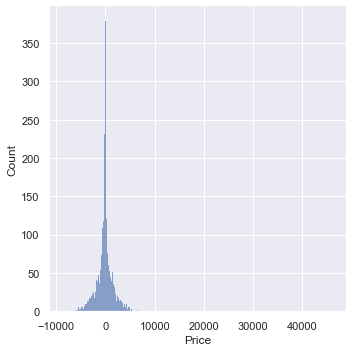

In [164]:
sns.displot(y_test-y_pred)
plt.show()

In [165]:
from sklearn import metrics

In [170]:
print('MAE: Mean Absolute Error = ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: Mean Squared Error = ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: Root of Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: Mean Absolute Error =  1176.75528257204
MSE: Mean Squared Error =  4378627.310246204
RMSE: Root of Mean Squared Error =  2092.5169796793057


In [171]:
metrics.r2_score(y_test,y_pred)

0.7969290477485839